In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('beach-438500_1280.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist

array([[1.2100e+02],
       [7.1000e+01],
       [1.0200e+02],
       [1.2700e+02],
       [2.0000e+02],
       [2.9800e+02],
       [4.4900e+02],
       [5.4800e+02],
       [7.5000e+02],
       [8.5400e+02],
       [1.0480e+03],
       [1.0650e+03],
       [1.2680e+03],
       [1.2560e+03],
       [1.2890e+03],
       [1.4950e+03],
       [1.5010e+03],
       [1.6420e+03],
       [1.8540e+03],
       [1.9560e+03],
       [2.0910e+03],
       [2.3690e+03],
       [2.5540e+03],
       [2.7790e+03],
       [3.1710e+03],
       [3.3350e+03],
       [3.6900e+03],
       [4.1120e+03],
       [4.3580e+03],
       [4.7750e+03],
       [5.1630e+03],
       [5.6630e+03],
       [6.2140e+03],
       [6.6640e+03],
       [6.9730e+03],
       [7.3260e+03],
       [7.6190e+03],
       [7.5070e+03],
       [7.8810e+03],
       [8.0220e+03],
       [8.3600e+03],
       [8.1590e+03],
       [8.1020e+03],
       [7.8800e+03],
       [7.4480e+03],
       [7.3440e+03],
       [7.0200e+03],
       [6.572

In [5]:
hist,bins = np.histogram(img.ravel(),256,[0,256])
hist

array([  121,    71,   102,   127,   200,   298,   449,   548,   750,
         854,  1048,  1065,  1268,  1256,  1289,  1495,  1501,  1642,
        1854,  1956,  2091,  2369,  2554,  2779,  3171,  3335,  3690,
        4112,  4358,  4775,  5163,  5663,  6214,  6664,  6973,  7326,
        7619,  7507,  7881,  8022,  8360,  8159,  8102,  7880,  7448,
        7344,  7020,  6572,  6310,  5962,  5950,  5649,  5519,  5634,
        5981,  6046,  6414,  6312,  6457,  6612,  6884,  7087,  7635,
        7790,  8048,  7957,  7971,  8225,  8409,  8601,  8932,  9408,
        9920, 10963, 11302, 11996, 11874, 11606, 11567, 11602, 11657,
       11243, 11335, 10944, 10637, 10502, 10368, 10369, 10346, 10151,
        9821,  9750,  9597,  9238,  9091,  8667,  8679,  9211,  9387,
        9331,  8926,  8808,  8609,  8580,  8344,  7904,  7851,  8246,
        8055,  8280,  8581,  8496,  8164,  7847,  7587,  7392,  7234,
        7102,  7118,  7259,  6986,  6772,  6743,  6673,  6367,  5898,
        5610,  5272,

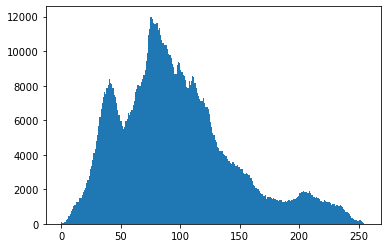

In [6]:
plt.hist(img.ravel(),256,[0,256]);
plt.show()

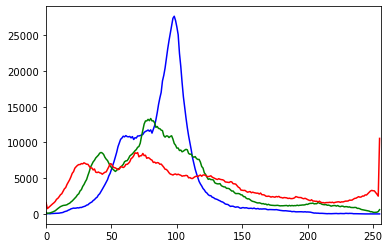

In [9]:
color = ('b','g','r')
img = cv2.imread('beach-438500_1280.jpg')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

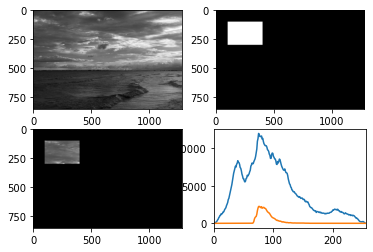

In [12]:
img = cv2.imread('beach-438500_1280.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full),  plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

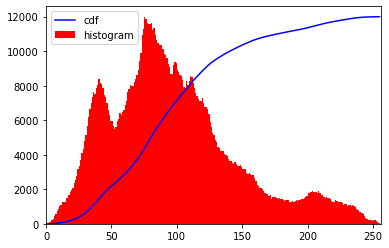

In [13]:
img = cv2.imread('beach-438500_1280.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [14]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [16]:
img2 = cdf[img]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f8d50f94850>)

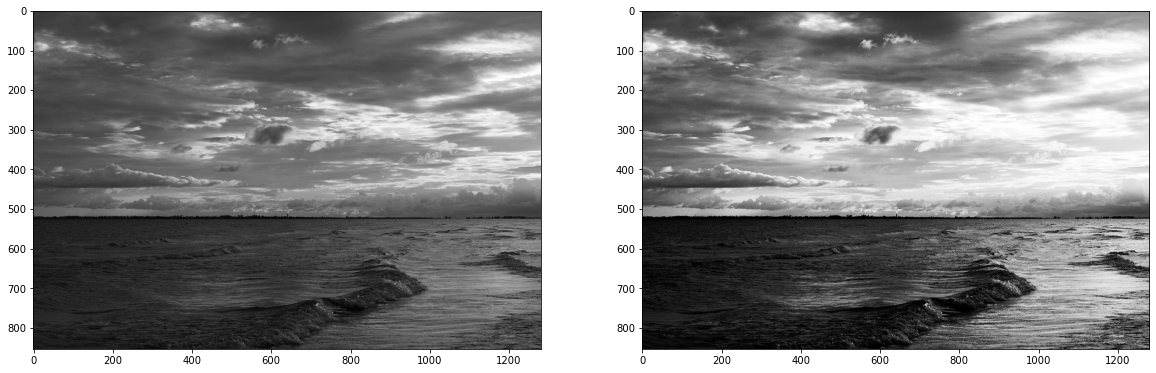

In [18]:
plt.figure(figsize=(20, 15))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(img2,'gray')

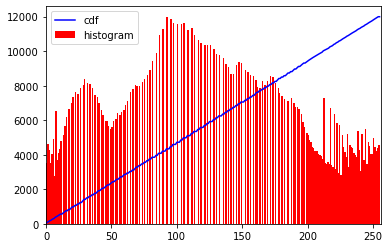

In [20]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f8d50917690>)

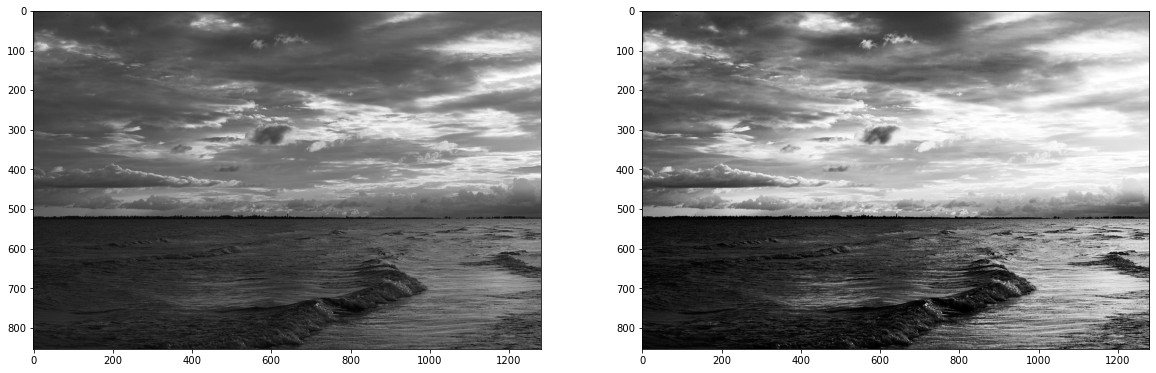

In [21]:
img = cv2.imread('beach-438500_1280.jpg',0)
equ = cv2.equalizeHist(img)

plt.figure(figsize=(20, 15))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(equ,'gray')

In [22]:
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True